In [1]:
import pandas as pd
import numpy as np

In [2]:
x_train=pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
x_test=pd.read_csv('x_test.csv')
y_test=pd.read_csv('y_test.csv')
x_val=pd.read_csv('x_val.csv')
y_val=pd.read_csv('y_val.csv')

In [3]:
x_train

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,adres,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr
0,-1,-1,-1,5,2005,-1,2,-1,-1,3,...,"Gdynia, Grabówek, Morska",trojmiasto,-1,-1,-1,-1,-1.0,-1,"Garaż, Winda, Kuchnia",-1
1,brak,wtórny,-1,3,2020,Gdynia,2,dowykończenia,-1,2,...,"Gdynia, Obłuże",otodom,pustak,Oferta biura nieruchomości,miejskie,0,200.0,-1,-1,-1
2,-1,-1,-1,4,1970,-1,3,-1,-1,2,...,"Gdańsk, Przymorze, Jagiellońska",trojmiasto,-1,-1,-1,-1,-1.0,-1,"Balkon, Piwnica, Kuchnia",-1
3,-1,-1,-1,4,2017,-1,4,-1,-1,4,...,"Gdynia, Działki, Leśne, Nautikka",trojmiasto,-1,-1,-1,-1,-1.0,C. o. miejskie,"Garaż, Winda, Taras, Miejsce parkingowe, Inter...",-1
4,brak,wtórny,-1,10,1970,Gdynia,3,-1,-1,10,...,"Gdynia, Chylonia, Lubawska",otodom,-1,Oferta biura nieruchomości,miejskie,0,-1.0,-1,-1,-1
5,-1,-1,-1,6,2016,-1,2,-1,-1,5,...,"Gdańsk, Śródmieście, Stara, Stocznia",trojmiasto,-1,-1,-1,-1,-1.0,-1,"Balkon, Winda, Miejsce parkingowe",-1
6,-1,-1,-1,3,1950,-1,3,-1,-1,2,...,"Gdańsk, Śródmieście",trojmiasto,-1,-1,-1,-1,-1.0,Miejskie,"Piwnica, Miejsce parkingowe, Kuchnia",-1
7,aneks,wtórny,tak,4,2006,Gdynia,2,bardzo wysoki standard,stanisława wyspiańskiego,1 / 4,...,"gdynia, kamienna góra, stanisława wyspiańskiego",morizon,cegła,-1,-1,-1,-1.0,-1,-1,-1
8,półotwarta,pierwotny,tak,6,2021,Gdańsk,3,-1,stara stocznia,6 / 6,...,"gdańsk, śródmieście, stara stocznia",morizon,-1,-1,-1,-1,-1.0,-1,-1,-1
9,-1,-1,-1,4,1995,-1,5,-1,-1,4,...,"Gdańsk, Orunia, Górna, Bpa, Konstantyna, Dominika",trojmiasto,-1,-1,-1,-1,-1.0,-1,Balkon,-1


### ZŁĄCZENIE X_TRAIN, X_TEST, X_VAL

In [7]:
x_train['zbior']=1

In [8]:
x_test['zbior']=2

In [9]:
x_val['zbior']=3

In [10]:
df = pd.concat([x_test, x_train, x_val],sort=False, ignore_index =True)

In [14]:
df['zbior'].value_counts()

1    13658
3     4553
2     4553
Name: zbior, dtype: int64

In [15]:
cat_feats=['rodzaj_zabudowy', 'dzielnica', 'forma-wlasnosci','kuchnia','rynek','balkon','miasto','wykonczenie','ulica','adres','serwis','material_budynku','typ_ogrzewania','dodatkowe_informacje','ulica_i_nr', 'oferta','ogrzewanie']

for feat in cat_feats:
    new_name='{}'.format(feat.lower())
    df[new_name]=df[feat].factorize()[0]

In [16]:
df

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr,zbior
0,0,0,0,3,2018,0,3,0,0,0,...,0,0,0,0,0,-1.0,0,0,0,2
1,1,1,1,4,2001,0,3,1,1,3 / 4,...,1,1,1,1,-1,-1.0,0,0,0,2
2,2,1,0,3,1950,1,3,2,2,2 / 3,...,1,2,1,1,-1,-1.0,0,0,0,2
3,3,2,0,3,2012,2,3,1,0,Parter,...,2,1,1,1,-1,-1.0,1,1,0,2
4,3,2,0,10,1975,2,3,1,0,5,...,2,1,1,1,-1,-1.0,0,0,0,2
5,3,1,1,3,2008,1,3,1,3,parter / 3,...,1,1,1,1,-1,-1.0,0,0,0,2
6,0,1,0,17,2019,1,3,3,0,11,...,0,1,2,1,0,-1.0,0,0,0,2
7,4,2,0,3,2011,1,3,1,0,0,...,3,1,1,1,-1,-1.0,0,0,0,2
8,3,2,0,3,2001,2,2,1,0,Parter,...,2,1,1,1,-1,-1.0,1,2,0,2
9,3,2,0,2,2014,2,2,1,0,Parter,...,2,1,1,1,-1,-1.0,1,3,1,2


In [17]:
df['pietro']=df['pietro'].replace('Parter',0).replace('parter ',0)
df['pietro']=df['pietro'].map(lambda x: str(x).split('/')[0])

In [18]:
df['pietro']=df['pietro'].replace('parter ',0)

In [19]:
df['pietro']=df['pietro'].astype('int')

In [20]:
df['pietro'].value_counts()

 1     5357
 2     4156
 0     4142
 3     3893
 4     2284
 5      824
 6      494
 10     272
 8      257
 7      257
 9      233
-1      177
 11     148
 17      60
 12      51
 15      45
 14      40
 16      39
 13      20
 18      13
 25       2
Name: pietro, dtype: int64

In [21]:
df.head()

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr,zbior
0,0,0,0,3,2018,0,3,0,0,0,...,0,0,0,0,0,-1.0,0,0,0,2
1,1,1,1,4,2001,0,3,1,1,3,...,1,1,1,1,-1,-1.0,0,0,0,2
2,2,1,0,3,1950,1,3,2,2,2,...,1,2,1,1,-1,-1.0,0,0,0,2
3,3,2,0,3,2012,2,3,1,0,0,...,2,1,1,1,-1,-1.0,1,1,0,2
4,3,2,0,10,1975,2,3,1,0,5,...,2,1,1,1,-1,-1.0,0,0,0,2


### X_TRAIN

In [23]:
x_train=df[df['zbior']==1]

In [26]:
x_train.shape

(13658, 25)

### X_TEST

In [27]:
x_test=df[df['zbior']==2]

In [28]:
x_test.shape

(4553, 25)

### X_VAL

In [30]:
x_val=df[df['zbior']==3]

In [31]:
x_val.shape

(4553, 25)

### MODEL XGBOOST

In [40]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from ml_metrics import rmsle

model = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate= 0.3,  random_state= 0)
#max_depth - maksymalna głębokość drzew
#n_estimators - liczba drzew
#min_child_weight - minimalna liczba obserwacji w każdym liściu
#subsample - jaki procent obserwacji bierzemy do budowy drzewa
#colsample_bytree - ile procentowo chcemy wybrać cech charakterystycznych  do budowy drzewka
def custom_rmsle(model, x_test, y_test):
    y_pred=model.predict(x_test)
    y_pred[y_pred<0]=0
    
    return rmsle(y_test, y_pred)

cross_val_score(model, x_val, y_val, cv=5, scoring=custom_rmsle) #walidacja krzyżowa
#cross_val_score(model, x_val, y_val, scoring='r2') #walidacja krzyżowa
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

array([0.58360539, 0.56784212, 0.5645386 , 0.56953369, 0.57190791])

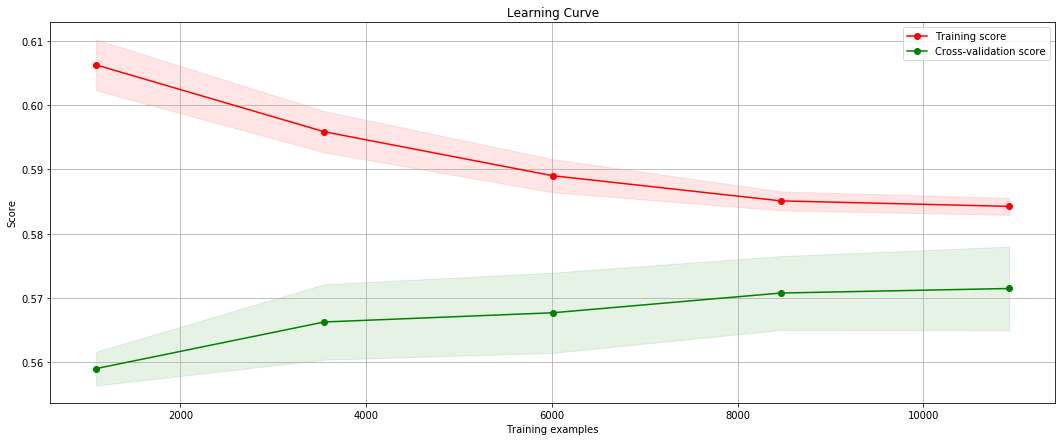

In [46]:
from scikitplot.estimators import plot_learning_curve
plot_learning_curve(model, x_train, y_train, cv=5, figsize=(18,7), scoring=custom_rmsle)

In [43]:
zmienne=x_train.columns
zmienne=zmienne.tolist()

In [45]:
from eli5.xgboost import explain_weights_xgboost
model = xgb.XGBRegressor(max_depth=10, n_estimators=100)
model.fit(x_train, y_train)
explain_weights_xgboost(model,feature_names=zmienne, importance_type='gain')

Weight,Feature
0.2369,powierzchnia
0.2167,oferta
0.0721,miasto
0.0657,rok_budowy
0.0541,rodzaj_zabudowy
0.0420,rynek
0.0384,dzielnica
0.0276,liczba_pokoi
0.0271,adres
0.0251,liczba_pieter_budynku
